Day 02 - We defined the price model but now with a vectorized simulation in src/sde_simulator/simulators.py, now we import it and use it to plot 100 prices for example !

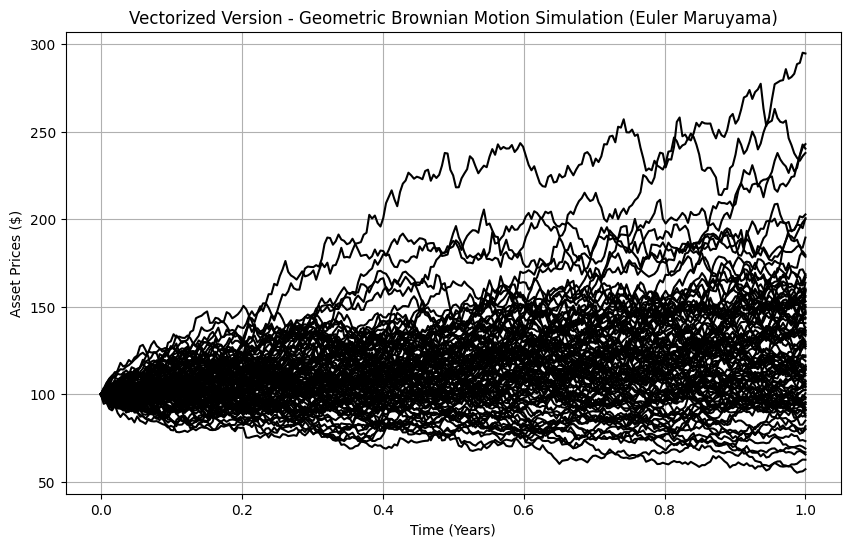

Simulated final prices (shape): (100,)
Analytical Mean (log): 0.1550
Analytical Stdev (log): 0.3000


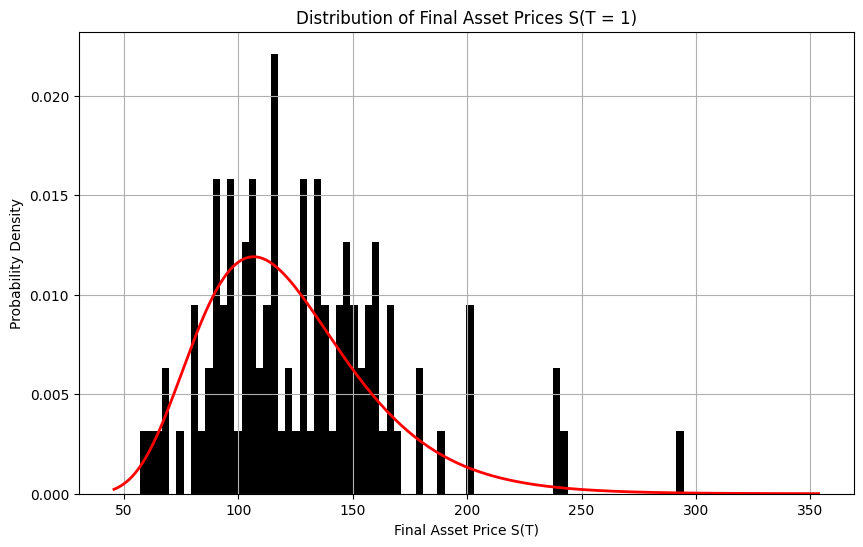

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

#importing simulation function here

from sde_simulator.simulators import simulate_gbm_em_vectorized

S0 = 100      #initial stock price
MU = 0.2      #drift (20% annual return)
SIGMA = 0.3   #volatility (30% annual volatility)
T = 1         #time horizon (1 year)
DT = 1/252    #time step (daily steps, 1/252 assuming 252 trading days basically)
PATHS = 10000   #number of paths (times we repeat the function we did on day 1 basically)

#run here
time_points, asset_paths_all = simulate_gbm_em_vectorized(S0, MU, SIGMA, T, DT, PATHS)

#plot, basic matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time_points, asset_paths_all[:, [_ for _ in range(PATHS)]], color = "black") #10 times
plt.title(f'Vectorized Version - Geometric Brownian Motion Simulation (Euler Maruyama)')
plt.xlabel('Time (Years)') ; plt.ylabel('Asset Prices ($)')
plt.grid(True)
plt.show() 


#analysis part
#final prices of the simulation extraction
SofT_simulated = asset_paths_all[-1, :] #last row, all columns
print(f"Simulated final prices (shape): {SofT_simulated.shape}")


#parameters calculation, for the log-normal distribution of S(T)
analytical_mean_log = (MU - 0.5 * SIGMA**2) * T #mean of the underlying normal distribution ln(S(T) / S0)
analytical_stdev_log = SIGMA * np.sqrt(T) #standard deviation of the underlying normal distribution ln(S(T) / S0)

print(f"Analytical Mean (log): {analytical_mean_log:.4f}")
print(f"Analytical Stdev (log): {analytical_stdev_log:.4f}")


plt.figure(figsize=(10, 6))
plt.hist(SofT_simulated, bins=75, density=True, label='Simulated S(T) (EM)', color = "black") 
#histogram with 75 bars
plt.title(f'Distribution of Final Asset Prices S(T = {T})')
plt.xlabel('Final Asset Price S(T)'); plt.ylabel('Probability Density')


from scipy.stats import lognorm

#calculation of the PDF (probability density function) curve
#min/max of simulated data to set a sensible range
plot_min, plot_max = SofT_simulated.min() * 0.8, SofT_simulated.max() * 1.2
x_values = np.linspace(plot_min, plot_max, 200)

scale_param = S0 * np.exp(analytical_mean_log) 
pdf_values = lognorm.pdf(x_values, s = analytical_stdev_log, scale = scale_param)

plt.plot(x_values, pdf_values, 'r-', lw=2, label='Analytical PDF')
plt.grid(True)
plt.show()